# Introduction to Classification in Supervised ML (with code walkthrough)

This is a beginner-friendly guide to **_classification_** in supervised machine learning. You’ll learn:

- What classification is and how it differs from regression.
- Examples of common classification algorithms.
- A hands-on example: Predicting house price category using synthetic data.

### What is Machine Learning
Machine Learning (ML) involves teaching or training a computer (or a model) to learn from examples (data) instead of giving it step-by-step instructions. It is a branch of artificial intelligence (AI) that employs statistical techniques to enable computer systems to learn patterns from data without explicit programming.
It is broadly categorized into:
- Supervised Learning: Training models using labelled datasets.
- Unsupervised Learning: Finding hidden patterns in data without labels.
- Reinforcement Learning: Learning through rewards and punishments.

### What is Supervised Machine Learning
Supervised learning is a type of ML where models learn from labelled data, meaning each training example includes both input features and a known correct output. The data has a column known as the target variable or independent variable. There are two main types:
- Classification: Predicting discrete labels (e.g., predicting loan default status).
- Regression: Predicting continuous values (e.g., predicting house prices).


### What is Classification
Classification is a type of supervised learning where the target variable is a category. It teaches the model how to assign labels to data—such as determining whether it will rain or not , or whether a customer will churn or stay.


### Examples of Classification Algorithms  
Some commonly used classification algorithms include:  

1. **Logistic Regression**: Despite its name, it's used for binary classification problems.  
2. **Decision Tree Classifier**: Uses a tree-like structure to split data into categories.  
3. **Random Forest Classifier**: An ensemble method combining multiple decision trees for better accuracy.  
4. **Support Vector Machine (SVM)**: Finds the optimal boundary between classes using support vectors.  
5. **K-Nearest Neighbors (KNN)**: Classifies data based on the majority class of its nearest neighbors.  
6. **Naïve Bayes**: Based on Bayes’ theorem, effective for text classification and spam detection.  
7. **Gradient Boosting Machines (GBM)**: Includes XGBoost, LightGBM, and CatBoost, known for high performance on structured data.

### Example Workflow in Machine Learning
A typical machine learning workflow may include the following steps:
1. Data Collection: Gather relevant data for training and testing.
2. Data Preprocessing: Clean and prepare the data by handling missing values, scaling, and encoding categorical variables if needed.
3. Feature Selection: Choose the most important features for better model performance.
4. Model Selection and Training: Choose an appropriate classification algorithm and train the model using the training dataset.
5. Model Evaluation: Assess performance using metrics like Accuracy, Precision and Recall.
6. Hyperparameter Tuning: Optimize the model for better accuracy.
7. Deployment: Deploy the trained model for real-world predictions.

## Code Walkthrough: Predict whether a house is "Expensive" or "Affordable" With Machine Learning

### Step 1: Import the necessary libraries

In [10]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation using DataFrames
import matplotlib.pyplot as plt # For visualization

from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
# Import the LogisticRegression model from scikit-learn's linear_model module
from sklearn.linear_model import LogisticRegression

# Import metrics for evaluating classification models from scikit-learn's metrics module
from sklearn.metrics import accuracy_score  # To calculate the accuracy of the model
from sklearn.metrics import confusion_matrix  # To create a confusion matrix for the model's predictions
from sklearn.metrics import classification_report  # To generate a detailed classification report including precision, recall, F1-score, and support

### Step 2: Generate a simple dataset

At this point, you will typically have to import a dataset using `read_csv` but we'll just create a synthetic dataset for this example.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 100

# Generate synthetic data based on the given ranges and patterns
sizes = np.random.randint(1400, 3000, num_samples)  # Random sizes between 1400 and 3000 sq ft
bedrooms = np.random.choice([2, 3, 4, 5, 6], num_samples)  # Random number of bedrooms between 2 and 6

# Generate price categories based on a simple rule:
# - 'Affordable' if size is less than 1900 sq ft and bedrooms are less than 5
# - 'Expensive' otherwise
price_category = np.where((sizes < 1900) & (bedrooms < 5), 'Affordable', 'Expensive')

# Create the DataFrame
data = {
    'Size (sq ft)': sizes,
    'Bedrooms': bedrooms,
    'Price Category': price_category
}

df = pd.DataFrame(data)

# Display the first few rows of the generated data
df.head()

,Size (sq ft),Bedrooms,Price Category
0,2526,6,Expensive
1,2859,6,Expensive
2,2260,3,Expensive
3,2694,6,Expensive
4,2530,3,Expensive


### Step 3: Exploratory Data Analysis (EDA)

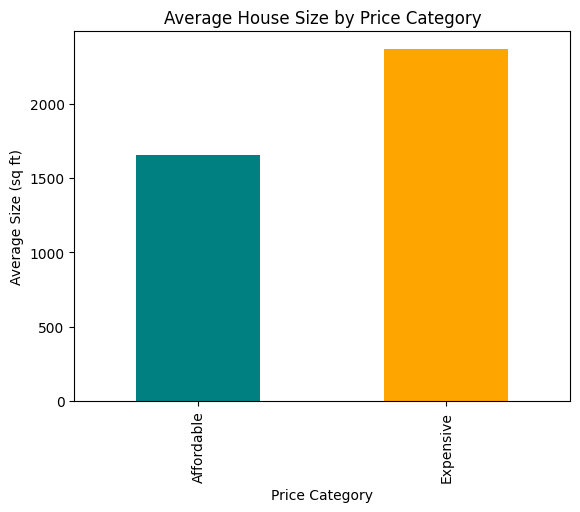

In [6]:
# Let's use a bar chart to see if there's a relationship between Price Category and House size

# Group the data by 'Price Category' and calculate the average house size in each category
avg_size_per_category = df.groupby('Price Category')['Size (sq ft)'].mean()

# Plot the average house size for each price category as a bar chart
avg_size_per_category.plot(kind='bar', color=['teal', 'orange'])

# Add a title to describe the plot
plt.title("Average House Size by Price Category")

# Label the x-axis (categories of price: e.g., 'Affordable', 'Expensive')
plt.xlabel("Price Category")

# Label the y-axis (average house size in square feet)
plt.ylabel("Average Size (sq ft)")

# Display the plot
plt.show()


# Here we’ll see that "Expensive" houses tend to be larger.

Practice: Try Price Category vs. Bedrooms

### Step 4: Encode the target variable (convert the categories to numbers)

In [7]:
# 'Affordable' is mapped to 0, and 'Expensive' is mapped to 1
df['Price Category'] = df['Price Category'].map({'Affordable': 0, 'Expensive': 1})

### Step 5: Separate features and target variable

In [8]:
X = df[['Size (sq ft)', 'Bedrooms']]
y = df['Price Category']

### Step 6: Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X: Features (independent variables) in the dataset
# y: Target (dependent variable) in the dataset

# test_size=0.2: Specifies that 20% of the data should be used for the
# test set, and the remaining 80% for the training set.

# random_state=42: Ensures that the data is split in the same way every time
# you run the code, providing reproducibility.
# The number 42 is arbitrary and can be any integer.

# X_train: Training data for the features
# X_test: Testing data for the features

# y_train: Training data for the target
# y_test: Testing data for the target

### Step 7: Choose and train the model

In [12]:
model = LogisticRegression()  # Initialize a Logistic Regression model
model.fit(X_train, y_train)   # Train the model using the training data (X_train) and the corresponding target values (y_train)

LogisticRegression()

### Step 8: Make predictions

In [13]:
y_pred = model.predict(X_test) # Use the trained model to make predictions on the test data (X_test)

# Check predictions vs. actual values:
# Remember that 1 means Expensive and 0 means Affordable
print(y_pred) # To view your predictions
print(y_test) # To view the actual answers

[1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1]
83    1
53    0
70    1
45    1
44    1
39    1
22    1
80    1
10    0
0     1
18    1
30    0
73    1
33    1
90    0
4     1
76    1
77    1
12    1
31    1
Name: Price Category, dtype: int64


### What happens in the "backend"?

In Logistic Regression, the process is a bit different from Linear Regression because instead of predicting a continuous outcome (like price), you're predicting a **probability that an instance belongs to a particular class** (like "rain" or "no rain" or in our case, "expensive" or "affordable").

The steps involve

- calculating the linear combination of the features like in linear regression,
- applying a formula or function called the sigmoid function,
- and then using a threshold (usually 0.5) to make a prediction. More like, is the result of the sigmoid function greater than or less than the set threshold (usually 0.5)

**Steps to Make a Prediction with Logistic Regression**

1. **Linear Combination**: Compute the linear combination of the features using the coefficients and intercept.

   $
   z = \text{intercept} + \text{coef}_1 \times \text{feature}_1 + \text{coef}_2 \times \text{feature}_2 + \dots
   $

    or

    `z = 𝜃0 + 𝜃1𝑥1 + 𝜃2𝑥2 + ...`
    
2. **Apply Sigmoid Function**: Use the sigmoid function to convert the linear combination $(z)$ into a probability.  

   $
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $


3. **Thresholding**: If the resulting probability is greater than or equal to 0.5, predict the class as 1 (e.g., "expensive"), otherwise, predict 0 (e.g., "affordable").

In [14]:
# Get the coefficients for each feature
coefficients = model.coef_
print("Coefficients:", coefficients)

# Get the intercept
intercept = model.intercept_
print("Intercept:", intercept)

Coefficients: [[0.00887793 1.48556028]]
Intercept: [-20.531817]


Use the formula with the gotten coefficients and intercept to make a prediction using a record in the test data

In [15]:
#### Step 1: Calculate the Linear Combination (z)

# Given coefficients and intercept
intercept = -20.53181245
coef_house_size = 0.00887793
coef_bedrooms = 1.48555931

# Input features from the record
house_size = 2529
bedrooms = 4

# Calculate the linear combination (z)
z = intercept + (coef_house_size * house_size) + (coef_bedrooms * bedrooms)
print("z: ", z)

#### Step 2: Apply the Sigmoid Function to Get the Probability

probability = 1 / (1 + np.exp(-z))
print("probability: ", probability)

#### Step 3: Make a Prediction Based on the Probability

# Predict class based on a threshold of 0.5
prediction = 1 if probability >= 0.5 else 0
print("prediction: ", prediction)

z:  7.862709759999997
probability:  0.9996153183756904
prediction:  1


In [17]:
# Compare with y_pred
print("Prediction:", y_pred[0])

probability = model.predict_proba(X_test.iloc[[0]])
print("Probability:",  probability)

Prediction: 1
Probability: [[3.84680156e-04 9.99615320e-01]]


This means that:
- The model predicts class 1 ("Expensive") with 99.96% probability (`9.99615320e-01`).
- The probability of class 0 ("Affordable") is very low (`3.84680156e-04` or 0.038%).

### Step 9: Evaluate the model

In [19]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# 'accuracy_score' compares the predicted labels 'y_pred' with the true labels 'y_test' and calculates the proportion of correctly classified instances.

# Generate the confusion matrix for the model's predictions
conf_matrix = confusion_matrix(y_test, y_pred)
# 'confusion_matrix' provides a matrix showing the number of true positives, false positives, true negatives, and false negatives.

# Create a detailed classification report
class_report = classification_report(y_test, y_pred)
# 'classification_report' generates a report including metrics like precision, recall, F1-score, and support for each class.

print("Predictions:", y_pred)
print("Actual values:", y_test.values)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Predictions: [1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1]
Actual values: [1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1]
Accuracy: 1.0
Confusion Matrix:
 [[ 4  0]
 [ 0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**Confusion Matrix??**
- **TP (4)**: Correctly predicted positives.
- **FP (0)**: Incorrectly predicted positives.
- **FN (0)**: Missed Positives (predicted as negative).
- **TN (16)**: Correctly predicted negatives.

### What do these metrics mean?

- **Accuracy** tries to answer the question: "What proportion of my model's predictions were correct?"
    - **Optimal Value**: As close to 100% or 1.0 as possible.
    - For instance, if your accuracy is `0.85`, it means the model correctly predicted the outcome 85% of the time.
    - **Note** that in **imbalanced datasets**, a high accuracy might be **misleading**, so precision, recall, or F1 score might be more appropriate.
    - For instance, a model predicts all the records passed through it as boys and gets an accuracy of 0.9 Meanwhile out of the 100 records, 10 are actually girls and the rest boys. It got just 10 wrong but those 10 were all the girls in the dataset.
---
- **Precision** tries to answer the question: "Of the instances predicted as positive by my model, how many were actually positive? (Roughly, how many false positives are there?)"
    - **Optimal Value:** As close to 1.0 (or 100%) as possible.
    - In our case, Precision is about being careful when you say something is affordable.
    - For instance: If the model says 10 houses are affordable, and 8 of them are actually affordable, the precision is 8 out of 10 (which is 80%).
---
- **Recall** tries to answer the question: "Of the actual positive instances in the data, how many did my model correctly identify as positive? (Roughly, how many false negatives are there?)"
    - **Optimal Value:** As close to 1.0 (or 100%) as possible.
    - In our case, **Recall** is about being thorough in predicting all the affordable houses.
    - For instance: If there are 10 affordable houses in the dataset, and the model correctly predicts 8 of them, the recall is 8 out of 10 (which is 80%).

---
- **F1 Score** tries to answer the question: "What is the balance between precision and recall in my model's performance?"
    - **Optimal Value:** As close to 1.0 (or 100%) as possible.
    - A higher F1 score indicates a good balance between precision and recall, meaning the model performs well in both avoiding false positives and false negatives.
---

### Predict the category of a new house

In [21]:
new_house = [[2500, 4]]  # Size: 2500 sq ft, 4 bedrooms
columns = ['Size (sq ft)', 'Bedrooms']
# Convert list to DataFrame
new_house_df = pd.DataFrame(new_house, columns=columns)

predicted_category = model.predict(new_house_df)
category = "Expensive" if predicted_category[0] == 1 else "Affordable"
print(f"The new house is predicted to be: {category}")

The new house is predicted to be: Expensive


### Next Steps:
You can try this code with real datasets ( e.g., [Chicago House Prices](https://www.kaggle.com/datasets/tawfikelmetwally/chicago-house-price) )


---
_**Your Dataness**_,  
**`Obinna Oliseneku`** (_**Hybraid**_)  
**[LinkedIn](https://www.linkedin.com/in/obinnao/)** | **[GitHub](https://github.com/hybraid6)**  